# Exploratory Analysis of the Indicators

## Univariate Analysis

In [1]:
#import libraries
import numpy as np
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
#read cleaned data for analysis
data_df = pd.read_csv("D:\Global_Economy_EDA\Extracted Data\IndicatorsData_cleaned.csv") #data csv path
data_df.columns

Index(['country', 'country code', 'countryiso3code', 'date', 'NE.EXP.GNFS.ZS',
       'BX.KLT.DINV.CD.WD', 'NY.GDP.MKTP.CD', 'NY.GDP.MKTP.KD.ZG',
       'NE.IMP.GNFS.ZS', 'NY.GDP.DEFL.KD.ZG', 'EN.POP.DNST', 'SP.POP.GROW',
       'SP.POP.TOTL', 'AG.SRF.TOTL.K2', 'SP.URB.GROW'],
      dtype='object')

In [4]:
data_df.columns

Index(['country', 'country code', 'countryiso3code', 'date', 'NE.EXP.GNFS.ZS',
       'BX.KLT.DINV.CD.WD', 'NY.GDP.MKTP.CD', 'NY.GDP.MKTP.KD.ZG',
       'NE.IMP.GNFS.ZS', 'NY.GDP.DEFL.KD.ZG', 'EN.POP.DNST', 'SP.POP.GROW',
       'SP.POP.TOTL', 'AG.SRF.TOTL.K2', 'SP.URB.GROW'],
      dtype='object')

In [5]:
column_rename = { 'NE.EXP.GNFS.ZS': 'Exports percentGDP',
       'BX.KLT.DINV.CD.WD':'FDI', 'NY.GDP.MKTP.CD':'GDP', 'NY.GDP.MKTP.KD.ZG':'GDP growth',
       'NE.IMP.GNFS.ZS':'Imports percentGDP', 'NY.GDP.DEFL.KD.ZG':'Inflation', 'EN.POP.DNST':'Population Density', 'SP.POP.GROW':'Population Growth',
       'SP.POP.TOTL':'Total Population', 'AG.SRF.TOTL.K2':'Total Surface Area', 'SP.URB.GROW':'Population Growth Urban'
}

In [6]:
data_df.rename(column_rename,axis=1 ,inplace=True, errors='raise')

In [7]:
data_df.head(5)

,country,country code,countryiso3code,date,Exports percentGDP,FDI,GDP,GDP growth,Imports percentGDP,Inflation,Population Density,Population Growth,Total Population,Total Surface Area,Population Growth Urban
0,Afghanistan,AF,AFG,2020,0.0,1.297015e+07,2.011614e+10,-2.351101,0.0,7.821667,59.627395,2.303812,38928341.0,0.0,3.354421
1,Afghanistan,AF,AFG,2019,0.0,2.340455e+07,1.879945e+10,3.911603,0.0,6.521480,58.269395,2.313073,38041757.0,0.0,3.323827
2,Afghanistan,AF,AFG,2018,0.0,1.194351e+08,1.805323e+10,1.189228,0.0,2.071349,56.937049,2.384309,37171922.0,652860.0,3.349934
3,Afghanistan,AF,AFG,2017,0.0,5.153390e+07,1.875347e+10,2.647003,0.0,2.403656,55.595550,2.547833,36296111.0,652860.0,3.462893
4,Afghanistan,AF,AFG,2016,0.0,9.359132e+07,1.811656e+10,2.260314,0.0,-2.197526,54.196961,2.778035,35383028.0,652860.0,3.649128


**Let us first consider only one country to better understand the relationship of the variables**

In [8]:
india_df = data_df[data_df['country']=='India'].drop(columns=['country code', 'countryiso3code'])

In [17]:
#Making the FDI column as a percent of GDP rather than an absolute value

india_df['FDI percentGDP'] = (india_df['FDI']/india_df['GDP'])*100

In [18]:
india_df.head(5)

,country,date,Exports percentGDP,FDI,GDP,GDP growth,Imports percentGDP,Inflation,Population Density,Population Growth,Total Population,Total Surface Area,Population Growth Urban,FDI percentGDP
1806,India,2020,18.708899,6.436236e+10,2.667688e+12,-6.596081,19.096455,5.600919,464.149410,0.989414,1.380004e+09,0.0,2.297828,2.412665
1807,India,2019,18.690983,5.061065e+10,2.831552e+12,3.737919,21.271545,2.390749,459.579696,1.013261,1.366418e+09,0.0,2.303752,1.787382
1808,India,2018,19.927829,4.211745e+10,2.702930e+12,6.453851,23.689141,3.884240,454.946466,1.037828,1.352642e+09,3287259.0,2.309470,1.558215
1809,India,2017,18.791765,3.996609e+10,2.651473e+12,6.795383,21.950732,3.969258,450.249321,1.063359,1.338677e+09,3287259.0,2.315210,1.507317
1810,India,2016,19.158235,4.445857e+10,2.294798e+12,8.256306,20.924251,3.237975,445.486918,1.090459,1.324517e+09,3287259.0,2.318510,1.937363


***Following is the GDP and GDP growth parameters against time***
-   GDP growth fall to -6.0 is the effect of the Pandamic, which is also visible in the subsequent GDP plot
-   The fall in GDP growth is so big that it has affected the 5-year rolling mean of the GDP (falling to 4 from over 6.2)

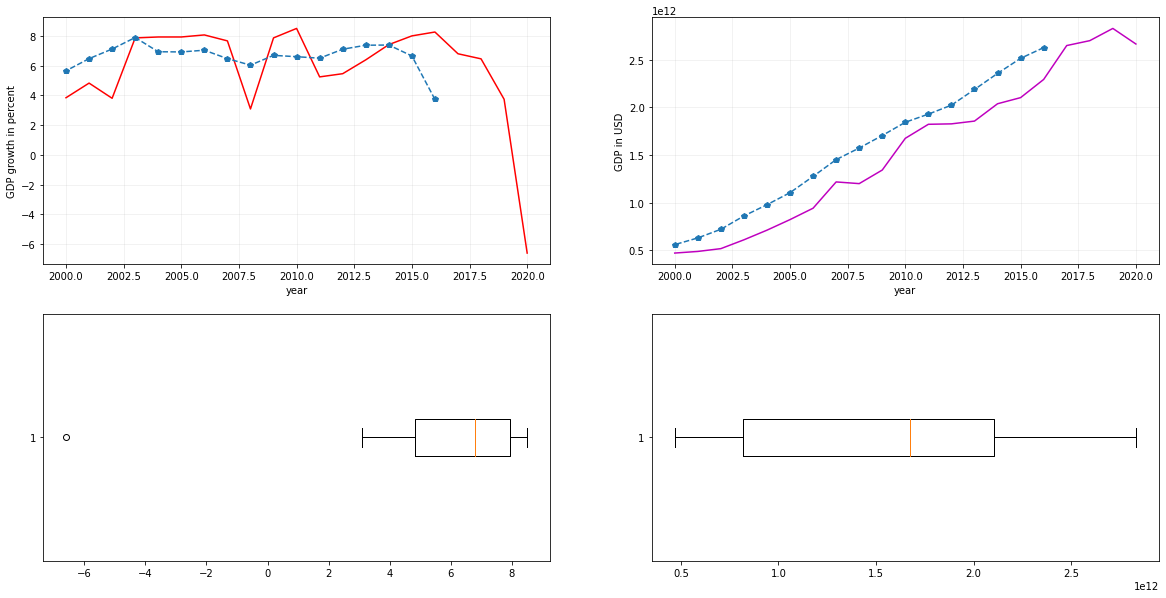

In [19]:
plt.figure(num=1,figsize=(20,10))
plt.subplot(221)
plt.xlabel('year'), plt.ylabel('GDP growth in percent')
plt.plot(india_df['date'], india_df['GDP growth'],'r-',label='true GDP growth')
plt.plot(india_df['date'], india_df['GDP growth'].rolling(5).mean(), 'p--', label='5yr-avg')
plt.grid(alpha=0.2)

plt.subplot(222)
plt.xlabel('year'), plt.ylabel('GDP in USD')
plt.plot(india_df['date'], india_df['GDP'], 'm-', label='True GDP')
plt.plot(india_df['date'], india_df['GDP'].rolling(5).mean(), 'p--',label='5yr-avg')
plt.grid(alpha=0.2)

plt.subplot(223)
plt.boxplot(india_df['GDP growth'],  notch=False, vert=False)

plt.subplot(224)
plt.boxplot(india_df['GDP'], notch=False, vert=False)
plt.show()

***Variation of FDI over time***
-   FDI saw an outlandish peak in 2008 co-incidentally when the GDP growth was at a minimum in the previous 5 year period
-   FDI seems to have fallen to a plateau in terms of a 5-yr average after 2010, with a steep rise until then


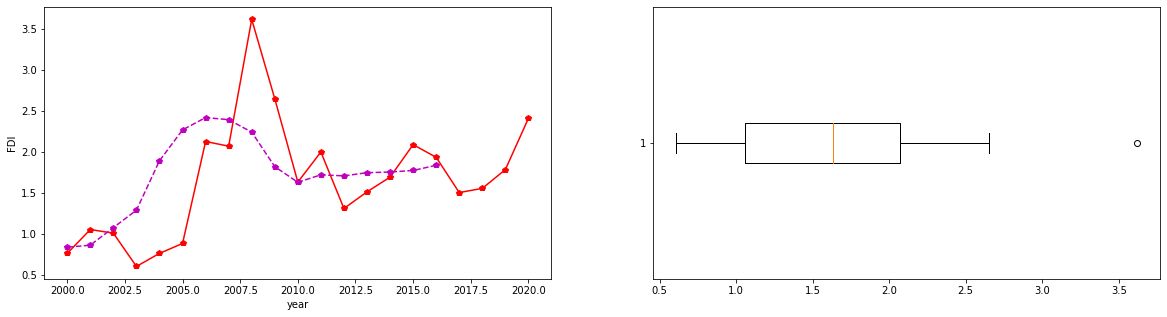

In [21]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.xlabel('year'), plt.ylabel('FDI')
plt.plot(india_df['date'], india_df['FDI percentGDP'], 'rp-', label='FDI')
plt.plot(india_df['date'], india_df['FDI percentGDP'].rolling(5).mean(), 'mp--', label='5yr-mean')

plt.subplot(122)
plt.boxplot(india_df['FDI percentGDP'], vert=False)

plt.show()

***Imports and Exports as a percentage of GDP over time***
-   Both imports and exports parameters follow each other very closely, and the imports are always higher than the exports in respective years 
-   Both exports and imports are on a decreasing trend from 2012, which can be an indicator of self-sufficiency, Since the imports has fallen steeply compared to exports

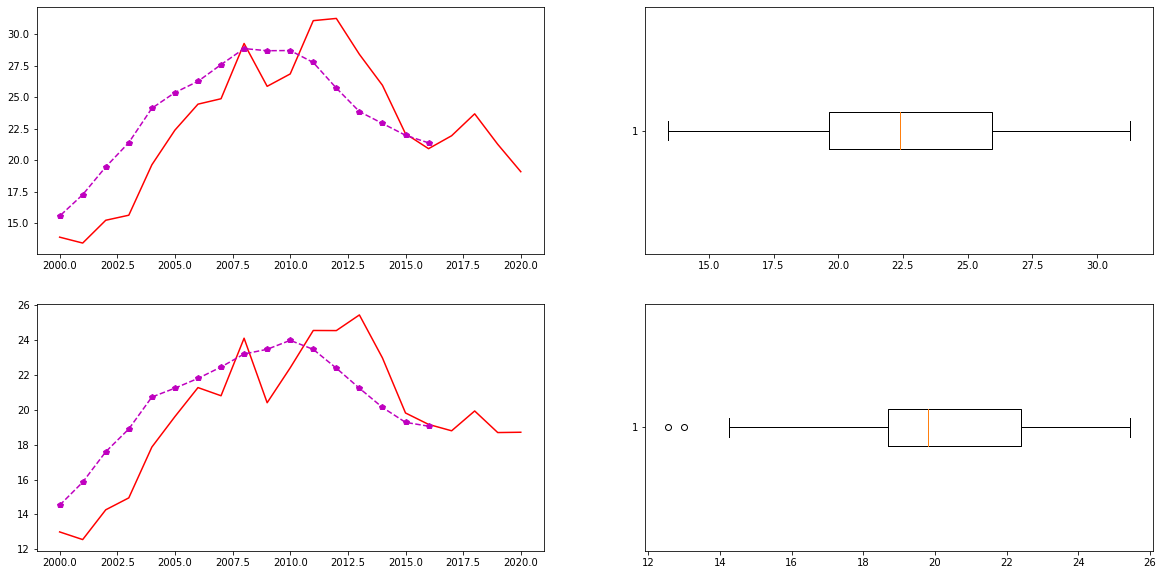

In [22]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.plot(india_df['date'], india_df['Imports percentGDP'], 'r-', label='Imports')
plt.plot(india_df['date'], india_df['Imports percentGDP'].rolling(5).mean(), 'mp--', label='5yr-mean')

plt.subplot(222)
plt.boxplot(india_df['Imports percentGDP'],vert=False)

plt.subplot(223)
plt.plot(india_df['date'], india_df['Exports percentGDP'], 'r-', label='Exports')
plt.plot(india_df['date'], india_df['Exports percentGDP'].rolling(5).mean(), 'mp--', label='5yr-mean')

plt.subplot(224)
plt.boxplot(india_df['Exports percentGDP'], vert=False)

plt.show()

***Inflation through the years***
-   Inflation has been on a falling trend from 2010, until 2020 when the pandemic hit. Even then, the inflation in 2020 is lower than the decade high of over 10

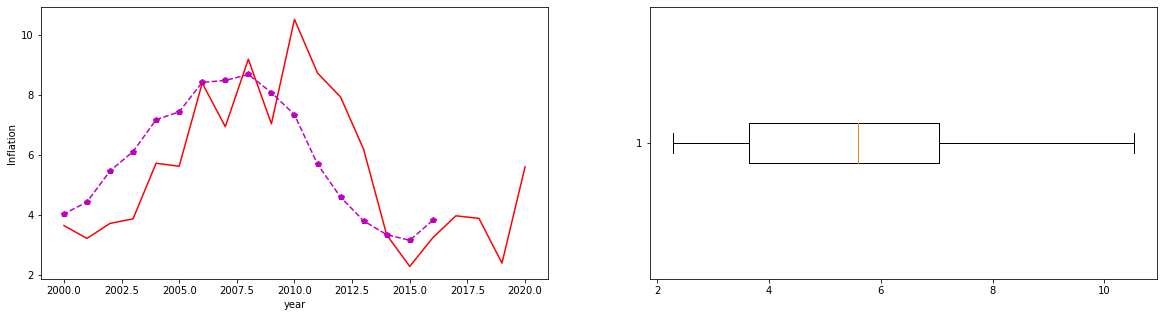

In [23]:
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.plot(india_df['date'],india_df['Inflation'],'r-', label='True Inflation')
plt.plot(india_df['date'],india_df['Inflation'].rolling(5).mean(), 'mp--', label='5yr-mean')
plt.xlabel('year'), plt.ylabel('Inflation')

plt.subplot(122)
plt.boxplot(india_df['Inflation'], vert=False)

plt.show()

***Visual Comparing other key economic indicators with GDP***

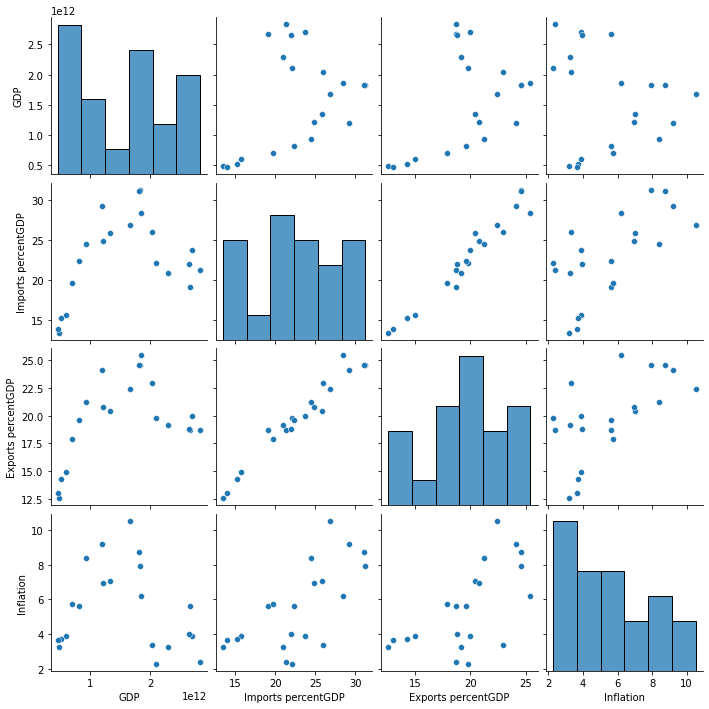

In [24]:
sns.pairplot(india_df[['GDP', 'Imports percentGDP', 'Exports percentGDP', 'Inflation']])

Text(0.5, 1.0, 'GDP vs Imports')

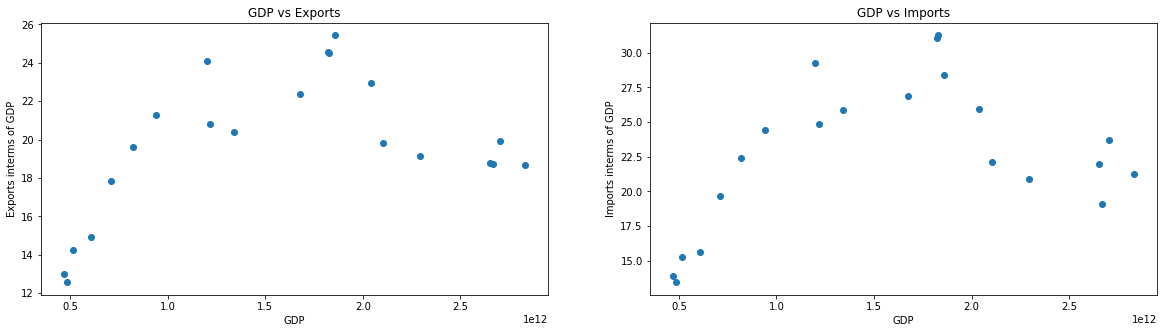

In [36]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.scatter(india_df['GDP'], india_df['Exports percentGDP'])
plt.xlabel('GDP'), plt.ylabel('Exports interms of GDP')
plt.title('GDP vs Exports')

plt.subplot(122)
plt.scatter(x=india_df['GDP'],y=india_df['Imports percentGDP'])
plt.xlabel('GDP'), plt.ylabel('Imports interms of GDP')
plt.title('GDP vs Imports')

Text(0.5, 1.0, 'imports vs exports')

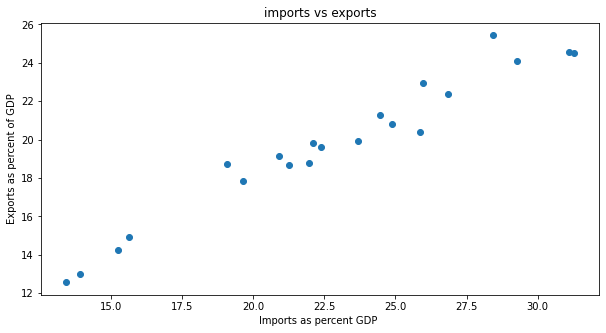

In [37]:
plt.figure(figsize=(10,5))
plt.scatter(india_df['Imports percentGDP'], india_df['Exports percentGDP'])
plt.xlabel('Imports as percent GDP '), plt.ylabel('Exports as percent of GDP') 
plt.title('imports vs exports')